In [8]:
import pandas as pd
import seaborn as sns
import sys
from matplotlib import pyplot as plt

%matplotlib inline

MIN_PYTHON = (3, 6)
if sys.version_info < MIN_PYTHON:
    sys.exit("Python %s.%s or later is required.\n" % MIN_PYTHON)

In [9]:
df1 = pd.read_csv('part1.log.csv', index_col='TS', names=['TS', 'Speed', 'TLD', 'Location'])
df2 = pd.read_csv('part2.log.csv', index_col='TS', names=['TS', 'Speed', 'TLD', 'Location'])

print(f"part 1: {len(df1.index)} part 2: {len(df2.index)}\n")

# Filter by speed
# df1 = df1[df1['Speed'] < 5000]
# df2 = df2[df2['Speed'] < 5000]

# remove rows from TLDs with low occurances
df1 = df1[df1.groupby('TLD').Speed.transform(len) >= 10]
print(df1['TLD'].value_counts())

df2 = df2[df2.groupby('TLD').Speed.transform(len) >= 10]

part 1: 1195 part 2: 1054

comcast.net            161
rr.com                  74
verizon.net             47
cox.net                 40
sbcglobal.net           37
virginm.net             37
t-ipconnect.de          36
btcentralplus.com       35
charter.com             27
shawcable.net           25
qwest.net               22
comcastbusiness.net     14
att.net                 14
telus.net               13
swisscom.ch             11
wanadoo.fr              10
ziggo.nl                10
Name: TLD, dtype: int64


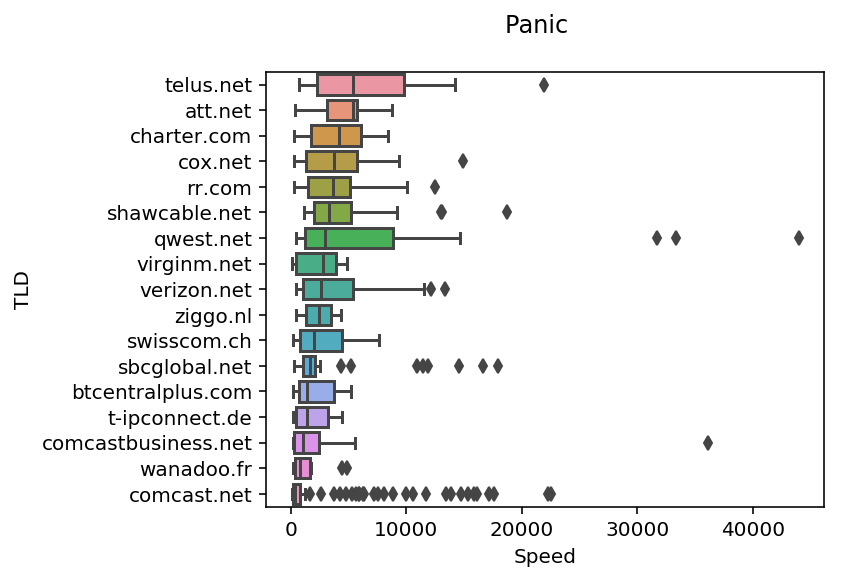

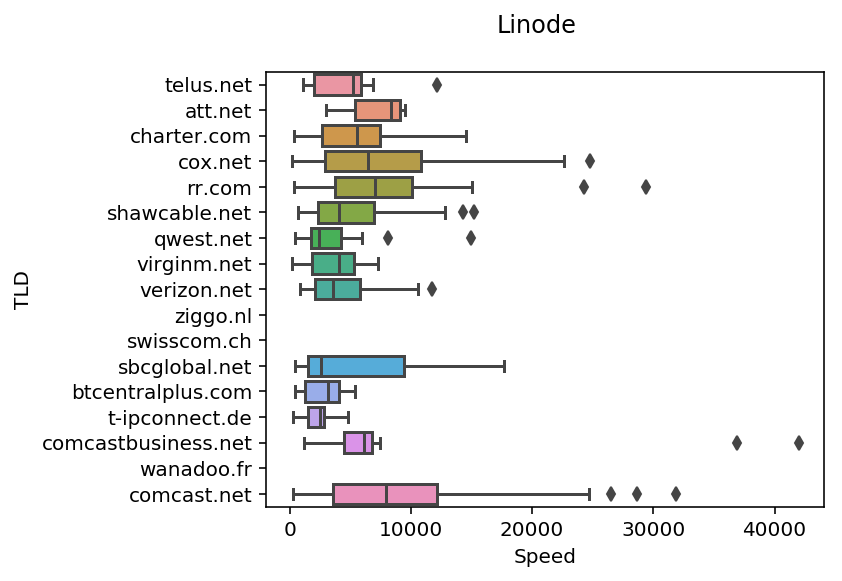

In [6]:
# Sort the TLDs by mean speed
ranks1 = df1.groupby("TLD")["Speed"].median().fillna(0).sort_values()[::-1].index
ranks2 = df2.groupby("TLD")["Speed"].median().fillna(0).sort_values()[::-1].index

FIG_WIDTH = 5
FIG_HEIGHT = 4

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
fig.suptitle('Panic')
bp1 = sns.boxplot(data=df1, y='TLD', x='Speed', orient='h', order=ranks1)

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
fig.suptitle('Linode')
bp2 = sns.boxplot(data=df2, y='TLD', x='Speed', orient='h', order=ranks1)


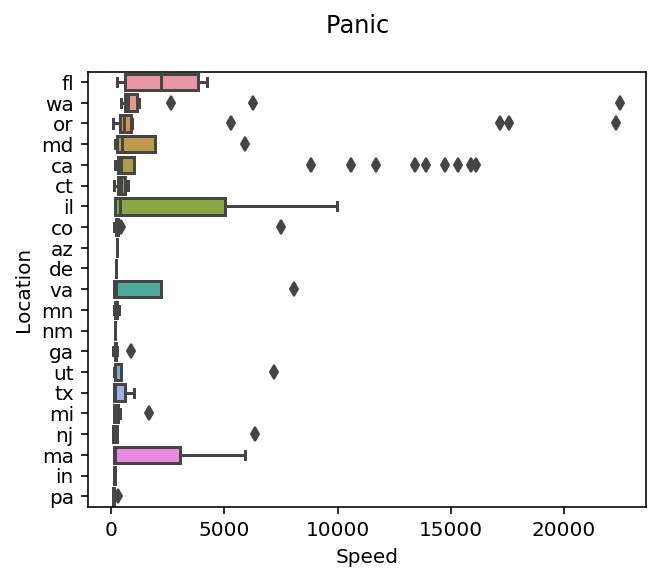

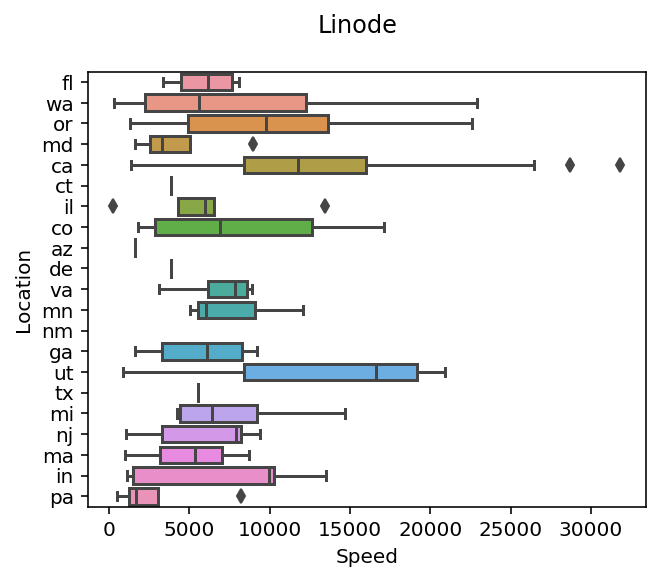

In [7]:
# Sort the TLDs by mean speed
ranks1 = df1.groupby("Location")["Speed"].median().fillna(0).sort_values()[::-1].index
ranks2 = df2.groupby("Location")["Speed"].median().fillna(0).sort_values()[::-1].index


fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
_ = fig.suptitle('Panic')
bp1 = sns.boxplot(data=df1, y='Location', x='Speed', orient='h', order=ranks1)

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGHT)
fig.suptitle('Linode')
bp2 = sns.boxplot(data=df2, y='Location', x='Speed', orient='h', order=ranks1)